# 11. Estimating unknown quantities from a sample

[Source](https://ethanweed.github.io/pythonbook/04.03-estimation.html)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math

import warnings
warnings.filterwarnings('ignore')

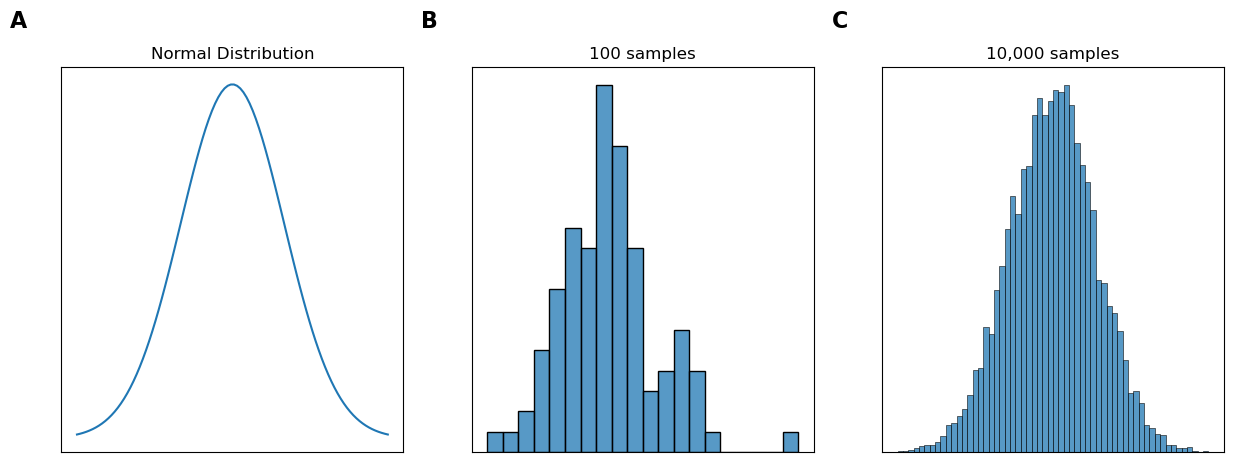

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# plot normal distribution
mu = 100
sigma = 15
x = np.linspace(mu-sigma*3, mu+sigma*3, 100)
y = stats.norm.pdf(x, mu, sigma)
ax0 = sns.lineplot(x=x, y=y, ax=axes[0])

# plot histogram of 100 samples from normal distribution
IQ = np.random.normal(loc=mu, scale=sigma, size=100)
ax1 = sns.histplot(IQ, ax=axes[1], binwidth=5)

# plot histogram of 100 samples from normal distribution
IQ = np.random.normal(loc=mu, scale=sigma, size=10000)
ax2 = sns.histplot(IQ, ax=axes[2])

labels = ['A', 'B', 'C']
titles = ['Normal Distribution', '100 samples', '10,000 samples']

for i, ax in enumerate(axes):
    ax.set_title(titles[i])
    ax.text(-0.1, 1.15, labels[i], transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='right')
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set(ylabel=None)
    ax.tick_params(axis='both', 
                   which='both',
                   bottom=False,
                   left=False)

In [13]:
IQ = np.random.normal(loc=mu, scale=sigma, size=100)
print(f'{mu=}\t{IQ.mean()=}')

mu=100	IQ.mean()=100.70891494877085


# Law of Large Numbers

In [15]:
import statistics

IQ_10 = np.random.normal(loc=100, scale=15, size=10)
IQ_100 = np.random.normal(loc=100, scale=15, size=100)
IQ_10000 = np.random.normal(loc=100, scale=15, size=10000)

print(f'10 samples \t {statistics.mean(IQ_10)=}\t{statistics.stdev(IQ_10)=}')
print(f'100 samples \t {statistics.mean(IQ_100)=}\t{statistics.stdev(IQ_100)=}')
print(f'10000 samples \t {statistics.mean(IQ_10000)=}\t{statistics.stdev(IQ_10000)=}')

10 samples 	 statistics.mean(IQ_10)=90.1152156371391	statistics.stdev(IQ_10)=20.06021754901265
100 samples 	 statistics.mean(IQ_100)=100.56187075180803	statistics.stdev(IQ_100)=16.221299325826834
10000 samples 	 statistics.mean(IQ_10000)=100.12305988376761	statistics.stdev(IQ_10000)=14.954662483222194


In [18]:
print(f'10 samples \t {IQ_10.mean()=}\t{IQ_10.std()=}')
print(f'100 samples \t {IQ_100.mean()=}\t{IQ_100.std()=}')
print(f'10000 samples \t {IQ_10000.mean()=}\t{IQ_10000.std()=}')

10 samples 	 IQ_10.mean()=90.11521563713912	IQ_10.std()=19.030793344008117
100 samples 	 IQ_100.mean()=100.56187075180804	IQ_100.std()=16.13998904274378
10000 samples 	 IQ_10000.mean()=100.12305988376761	IQ_10000.std()=14.95391473140377


Numpy `std()` uses $n$ degrees of freedom, `statistics.stdev()` uses $n-1$.

## Sampling distribution of the mean

With this in mind, let’s abandon the idea that our studies will have sample sizes of 10000, and consider a very modest experiment indeed. This time around we’ll sample $N=5$ people and measure their IQ scores. As before, I can simulate this experiment in Python using numpy’s `random.normal()` function. We can convert these to integers with `astype(int)`

In [21]:
IQ_1 = np.random.normal(loc=100, scale=15, size=5).astype(int)
print(f'Simulated data: {IQ_1}\n Mean of simulated data: {statistics.mean(IQ_1)}')

Simulated data: [104  66  89 104 101]
 Mean of simulated data: 92


If I repeat the experiment 10 times, I can a whole series of simulated experiments, each showing the results of five “people” participating in my “experiment”, like so:

In [23]:
import pandas as pd
persons = ['Person 1', 'Person 2', 'Person 3', 'Person 4', 'Person 5']
df = pd.DataFrame(
    {persons[i]: np.random.normal(loc=100, scale=15, size=10).astype(int) for i in range(5)}
)

In [27]:
df['Sample Mean']=df.mean(axis=1)
df.index=[f'Replication {str(i+1)}' for i in range(len(df))]
df

,Person 1,Person 2,Person 3,Person 4,Person 5,Sample Mean
Replication 1,95,70,94,105,114,95.6
Replication 2,98,115,83,101,118,103.0
Replication 3,82,74,93,111,115,95.0
Replication 4,87,93,80,94,84,87.6
Replication 5,102,89,107,121,102,104.2
Replication 6,100,103,106,101,130,108.0
Replication 7,82,70,71,99,103,85.0
Replication 8,87,99,94,105,117,100.4
Replication 9,71,114,118,94,116,102.6
Replication 10,95,119,112,99,105,106.0


What if I continued like this for 10,000 replications, and then drew a histogram? Using the magical powers of Python that’s exactly what I did, and you can see the results in fig-IQ_samp_dist. As this picture illustrates, the average of 5 IQ scores is usually between 90 and 110. But more importantly, what it highlights is that if we replicate an experiment over and over again, what we end up with is a distribution of sample means! This distribution has a special name in statistics: it’s called the **sampling distribution of the mean**.

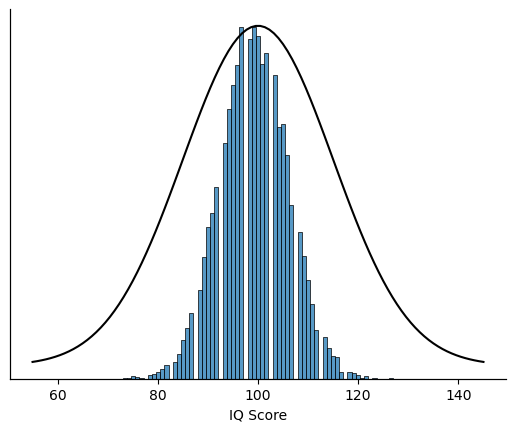

In [32]:
mu = 100
sigma = 15
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and 
# calculate the sample mean for each experiment

n = 5
sample_means = [statistics.mean(np.random.normal(loc=100,scale=15,size=5).astype(int)) for _ in range(1,10000)]
# sample_means = []
# for i in range(1,10000):
#     sample_mean = statistics.mean(np.random.normal(loc=100,scale=15,size=5).astype(int))
#     sample_means.append(sample_mean)

# plot histogram of distribution of sample means with population distribution

fig, ax = plt.subplots()
sns.histplot(sample_means, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=x,y=y, ax=ax2, color='black')

# format the figure
axes=[ax, ax2]
for ax in axes:
    ax.set(yticklabels=[])
    ax.set(ylabel=None)
    ax.set(xlabel='IQ Score')
    ax.tick_params(axis='both', 
                    which='both',
                    left=False,
                    right=False)
    ax.spines[['right', 'top']].set_visible(False)

In [31]:
sample_means = [statistics.mean(np.random.normal(loc=100,scale=15,size=5).astype(int)) for _ in range(1,10000)]

In [39]:
import plotly.express as px
fig = px.histogram(sample_means, width=800, height=600)
fig.show()

In [44]:
import plotly.figure_factory as ff
fig = ff.create_distplot([sample_means], group_labels=['sample means'], curve_type='normal')
fig.update_layout(width=800, height=600)
fig2 = px.line()
fig.show()